# Data analysis for Musical Instruments and Amazon Baby Products category

In [1]:
import pandas as pd
import gzip
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read jason files for review and metadata
def parse(path):
    '''
    param path : path of the json file
    '''
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

# Create pandas dataframe from python dictionary
def getDF(path):
    '''
    param path : path of the json file
    '''
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

# Create rating matrix of all products for each user
def get_review(df1):
    '''
    param df1 : pandas dataframe with review data
    '''
    print("Creating review DF...")
    review_df = df1[["reviewerID", "asin", "overall"]]
    return review_df


# Preprocess meta-data dataframe
def get_metadata(df2):
    '''
    param df2 : pandas dataframe with meta-data
    '''
    print("Creating metadata DF...")
    df_related = df2["related"].apply(pd.Series)
    meta_df_without_related = pd.concat([df2, df_related], axis=1).drop(['related'], axis=1)
    return meta_df_without_related


# Dataset statistics for Baby products

In [4]:
# Reading files to convert it to dataframe
df1_baby = getDF('dataset/reviews_Baby.json.gz')
df2_baby = getDF('dataset/meta_Baby.json.gz')
asin_comp_baby = pd.read_csv('generatedData/asin_comp_baby.csv')
asin_comp_baby = asin_comp_baby.dropna()

# Create review dataframe for Amazon baby products
review_df_baby = get_review(df1_baby)

# Create meta-data dataframe for Amazon baby products
meta_df_baby = get_metadata(df2_baby)
print("Shape of meta dataframe:" + str(meta_df_baby.shape))

# Count number of ratings per user and per product
comp_df_baby = meta_df_baby[['asin','also_bought']]
comp_list_baby = comp_df_baby.apply(lambda x: pd.Series(x['also_bought']),axis=1).stack().reset_index(level=1, drop=True)
comp_list_baby.name = 'compProd'
comp_df_baby = comp_df_baby.drop('also_bought', axis=1).join(comp_list_baby)
asin_rating_count = review_df_baby.groupby("asin").count().reset_index()
asin_rating_count = asin_rating_count[['asin', 'overall']]
user_rating_count = review_df_baby.groupby("reviewerID").count().reset_index()
user_rating_count = user_rating_count[['reviewerID', 'overall']]

# Count number of rated complementary products per user
review_comp_baby = review_df_baby.merge(asin_comp_baby, left_on = 'asin', right_on='compProd')
review_comp_user_baby = review_comp_baby[['reviewerID', 'compProd']]
review_comp_user_baby = review_comp_user_baby.drop_duplicates()
review_comp_user_count_baby = review_comp_user_baby.groupby('reviewerID', as_index=False).count()

# Count number of rated complementary products per main prod
review_comp_mainprod_baby = review_comp_baby[['asin_y', 'compProd']]
review_comp_mainprod_baby = review_comp_mainprod_baby.drop_duplicates()
review_comp_mainprod_count_baby = review_comp_mainprod_baby.groupby('asin_y', as_index=False).count()

Creating review DF...
Creating metadata DF...
Shape of meta dataframe:(71317, 13)


In [5]:
print("Number of unique users for Baby products:" +str(review_df_baby['reviewerID'].nunique()))
print("Number of unique items in review dataframe for Baby products:" +str(review_df_baby['asin'].nunique()))
print("Number of unique base products for Baby products:" +str(meta_df_baby['asin'].nunique()))
print("Number of unique complementary products for baby products:" +str(comp_df_baby['compProd'].nunique()))

Number of unique users for Baby products:531890
Number of unique items in review dataframe for Baby products:64426
Number of unique base products for Baby products:71317
Number of unique complementary products for baby products:96183


In [37]:
#Caculate sparsity value

total_elements = review_df_baby['asin'].nunique() * review_df_baby['reviewerID'].nunique()
no_of_ratings = review_df_baby.shape[0]
sparsity = 1 - (no_of_ratings/total_elements)
print("Sparsity value of review dataframe is:" + str(sparsity))

Sparsity value of review dataframe is:0.9999732853346728


# Dataset statistics for Amazon Musical Instruments

In [36]:
# Reading files to convert it to dataframe
df1_music = getDF('dataset/reviews_Musical_Instruments.json.gz')
print("Shape of review dataframe:" + str(df1_music.shape))
df2_music = getDF('dataset/meta_Musical_Instruments.json.gz')
print("Shape of metadata dataframe:" + str(df2_music.shape))
review_df_music = get_review(df1_music)

meta_df_music = get_metadata(df2_music)
comp_df_music = meta_df_music[['asin', 'also_bought']]
comp_list_music = comp_df_music.apply(lambda x: pd.Series(x['also_bought']),axis=1).stack().reset_index(level=1, drop=True)
comp_list_music.name = 'compProd'

comp_df_music = comp_df_music.drop('also_bought', axis=1).join(comp_list_music)

asin_comp_music = pd.read_csv('generatedData/asin_comp.csv')
asin_comp_music = asin_comp_music.dropna()
m_review_comp = review_df_music.merge(asin_comp_music, left_on='asin', right_on='compProd')

# Count of rated products per user
review_comp_user = m_review_comp[['reviewerID', 'compProd']]
review_comp_user = review_comp_user.drop_duplicates()
review_comp_user_count = review_comp_user.groupby('reviewerID', as_index=False).count()

# Count of rated comp prod per main prod
review_comp_mainprod = m_review_comp[['asin_y', 'compProd']]
review_comp_mainprod = review_comp_mainprod.drop_duplicates()
m_review_comp_mainprod_count = review_comp_mainprod.groupby('asin_y', as_index=False).count()

Shape of review dataframe:(500176, 9)
Shape of metadata dataframe:(84901, 9)
Creating review DF...
Creating metadata DF...


In [21]:
print("Number of unique users Music:" + str(review_df_music['reviewerID'].nunique()))
print("Number of unique items in review dataframe Music:" + str(review_df_music['asin'].nunique()))
print("Number of unique base products Music:" + str(meta_df_music['asin'].nunique()))
print("Number of unique complementary products Music:" + str(comp_df_music['compProd'].nunique()))

Number of unique users Music:339231
Number of unique items in review dataframe Music:83046
Number of unique base products Music:84901
Number of unique complementary products Music:147487


In [38]:
total_elements = review_df_music['asin'].nunique() * review_df_music['reviewerID'].nunique()
no_of_ratings = review_df_music.shape[0]
sparsity = 1 - (no_of_ratings / total_elements)
print("Sparsity value of review dataframe is:" + str(sparsity))

Sparsity value of review dataframe is:0.9999822454938186


# Data Visualization for both Dataset

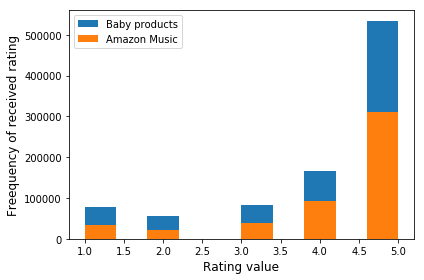

In [23]:
# Visualization of rating data

fig, ax = plt.subplots()
review_df_baby.plot.hist(ax=ax, legend=None)
review_df_music.plot.hist(ax=ax, legend=None)
ax.legend(["Baby products","Amazon Music"])
ax.set_xlabel('Rating value', fontsize=12)
ax.set_ylabel("Freequency of received rating", fontsize=12)
plt.tight_layout()
plt.savefig("dataGraph/rating_distribution.png")
plt.show()

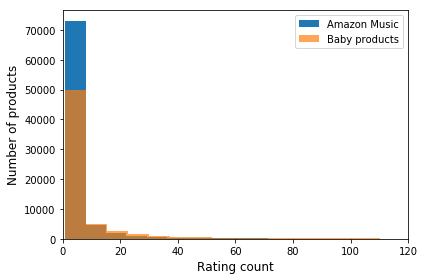

In [24]:
# Histogram for number of ratings received by each product

asin_rating_count_baby = review_df_baby.groupby("asin").count().reset_index()
asin_rating_count_baby = asin_rating_count_baby[['asin', 'overall']]
asin_rating_count_music = review_df_music.groupby("asin").count().reset_index()
asin_rating_count_music = asin_rating_count_music[['asin', 'overall']]

fig1, ax = plt.subplots()
asin_rating_count_music.plot.hist(ax=ax, bins=500, legend=None, color="tab:blue")
asin_rating_count_baby.plot.hist(ax=ax, bins=500, legend=None, alpha=0.7, color="tab:orange")
ax.legend(["Amazon Music", "Baby products"])
ax.set_xlim(0,120)
ax.set_xlabel('Rating count', fontsize=12)
ax.set_ylabel('Number of products', fontsize=12)
plt.tight_layout()
plt.savefig('dataGraph/ratingsperproduct.png')
plt.show()

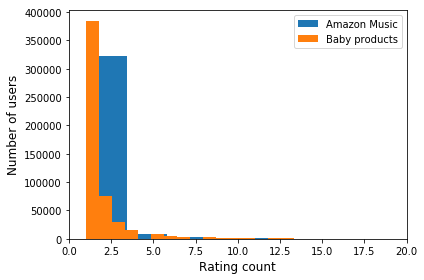

In [25]:
# Histogram for number of ratings given by each user

user_rating_count_baby = review_df_baby.groupby("reviewerID").count().reset_index()
user_rating_count_baby = user_rating_count_baby[['reviewerID', 'overall']]
user_rating_count_music = review_df_music.groupby("reviewerID").count().reset_index()
user_rating_count_music = user_rating_count_music[['reviewerID', 'overall']]

fig1, ax = plt.subplots()
user_rating_count_music.plot.hist(ax=ax, bins=200, legend=None)
user_rating_count_baby.plot.hist(ax=ax, bins=200, legend=None)
ax.legend(["Amazon Music", "Baby products"])

ax.set_xlim(0,20)
ax.set_xlabel('Rating count', fontsize=12)
ax.set_ylabel('Number of users', fontsize=12)
plt.tight_layout()
plt.savefig('dataGraph/ratingsperuser.png')
plt.show()

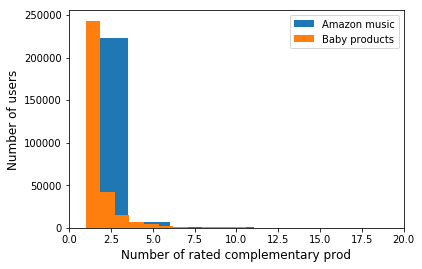

In [31]:
# Histogram for complementary product rating per user

fig,ax = plt.subplots()
m_review_comp_user_count.plot.hist(ax=ax, bins=100, legend=None)
review_comp_user_count_baby.plot.hist(ax=ax, bins=100, legend=None)

ax.legend(["Amazon music", "Baby products"])
ax.set_xlabel('Number of rated complementary prod', fontsize=12)
ax.set_ylabel('Number of users', fontsize=12)
ax.set_xlim(0,20)
plt.tight_layout()
plt.savefig('dataGraph/compperuser.png')
plt.show()

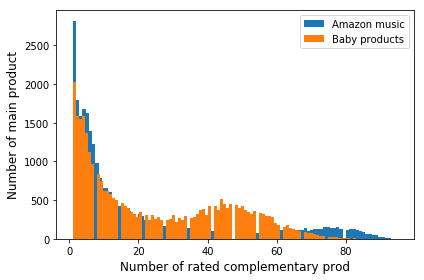

Error in callback <bound method VarWatcher.auto_run_flake8 of <pycodestyle_magic.VarWatcher object at 0x7fa89a3f4550>> (for post_run_cell):


TypeError: auto_run_flake8() missing 1 required positional argument: 'result'

Error in callback <bound method VarWatcher.auto_run_pycodestyle of <pycodestyle_magic.VarWatcher object at 0x7fa89a3f4550>> (for post_run_cell):


TypeError: auto_run_pycodestyle() missing 1 required positional argument: 'result'

Error in callback <bound method VarWatcher.auto_run_pycodestyle of <pycodestyle_magic.VarWatcher object at 0x7fa89a3f4550>> (for post_run_cell):


TypeError: auto_run_pycodestyle() missing 1 required positional argument: 'result'

Error in callback <bound method VarWatcher.auto_run_pycodestyle of <pycodestyle_magic.VarWatcher object at 0x7fa89a3f4550>> (for post_run_cell):


TypeError: auto_run_pycodestyle() missing 1 required positional argument: 'result'

In [53]:
# Histogram for complementary product rating per main product

fig1, ax = plt.subplots()
m_review_comp_mainprod_count.plot.hist(ax=ax, bins = 100, legend=None)
review_comp_mainprod_count_baby.plot.hist(ax=ax, bins = 100, legend=None)
ax.legend(["Amazon music", "Baby products"])
ax.set_xlabel('Number of rated complementary prod', fontsize=12)
ax.set_ylabel('Number of main product', fontsize=12)
plt.tight_layout()
plt.savefig('dataGraph/comppermain.png')
plt.show()
